In [54]:
import numpy as np

from PIL  import Image

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.cluster import KMeans

from IPython.display import display

from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy import ndimage as ndi
from skimage.morphology import medial_axis

from scipy import ndimage as ndi
from skimage.morphology import medial_axis

In [2]:
data = np.load("hiragana.npz")['arr_0'] 

In [3]:
letter = data[0,:]

In [4]:
def moment(array,m1,m2):
    moment = 0
    for y,ver in enumerate(array):
        for x,hor in enumerate(ver):
            moment += pow(x,m1)*pow(y,m2)*hor
    return moment

In [5]:
def center(array):
    x = moment(array,1,0)/moment(array,0,0)
    y = moment(array,0,1)/moment(array,0,0)
    return (x,y)

In [6]:
def translate(array,x,y):
    buffer = np.roll(array,-x,axis=1)
    buffer = np.roll(buffer,-y,axis=0)
    return buffer

In [7]:
def centeredarray(array):
    buffer = []
    for pic in tqdm(array):
        shape = pic.shape
        centroid = center(pic)
        delta_x = -shape[1]/2 + centroid[0]
        delta_y = -shape[0]/2 + centroid[1]

        buffer += [translate(pic,int(delta_x),int(delta_y))]
    return buffer

In [9]:
test = np.array(centeredarray(letter))

In [17]:
def predictPCA(n_components, letter, n_clusters=10, n_init=5):
    letter = letter.reshape(160,16256)
    pca = PCA(n_components=n_components).fit_transform(letter)
    pcak = KMeans(init='k-means++', n_clusters=(n_clusters), n_init=n_init)
    pcak.fit(pca)
    pred = pcak.predict(pca)
    return pred

In [20]:
pred = predictPCA(40, test)

In [51]:
def displayCluster(predicted, centered_array, array, n_cluster):
    inic = [i for i,v in enumerate(predicted) if v ==n_cluster]
    imgss = [array[i] for i in inic]
    new_img = np.average(imgss, axis = 0)
    display(Image.fromarray(new_img).convert("L"))

    imgssC = [centered_array[i] for i in inic]
    new_imgC = np.average(imgssC, axis = 0)
    plt.imshow(new_imgC)

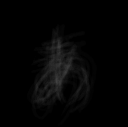

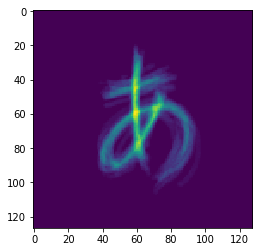

In [52]:
displayCluster(pred, test, letter, 2)

In [55]:
skel, distance = medial_axis(letter[0], return_distance=True)

In [56]:
dist_on_skel = distance * skel


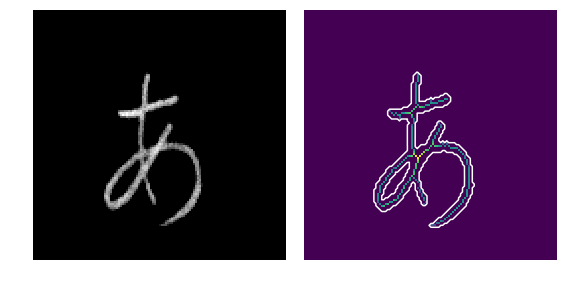

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True,
                               subplot_kw={'adjustable': 'box-forced'})
ax1.imshow(letter[0], cmap=plt.cm.gray, interpolation='nearest')
ax1.axis('off')
ax2.imshow(dist_on_skel, interpolation='nearest')
ax2.contour(letter[0], [0.5], colors='w')
ax2.axis('off')

fig.tight_layout()
plt.show()